In [113]:
# Fill in the following variables then run all cells
filepaths = ["/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+par/gc.log*", 
             "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/gc.log",
             "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+g1/gc.log*",
             "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk16+shen/gc.log*"] # note the wildcards
labels = ["jdk11 Par", "jdk11 cms", "jdk11 G1", "jdk16 Shen"]
time_range_seconds = [100, 600]   
csv_files_to_import = []
csv_file_labels = []

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# A gc_event_dataframe has the following columns
> ## DateTime

> ## TimeFromStart_seconds

> ## EventType

> ## EventName

> ## AdditionalEventInfo

> ## MemoryChange_MB

> ## Duration_miliseconds

In [114]:
files = []
import sys
sys.path.append("../")
import os.path
import pandas as pd
import matplotlib.pyplot as plt
from src.read_log_file import get_parsed_comparions_from_files, get_file_names_wildcard
# Get all files
for filepath in filepaths:
    files.append(get_file_names_wildcard(filepath))
# Parse all files
gc_event_dataframes = get_parsed_comparions_from_files(files, time_range_seconds,  ignore_crashes=False)

# Import CSV files
for csv_file, label in zip(csv_files_to_import, csv_file_labels):
    if os.path.isfile(csv_file):
        df = pd.read_csv(csv_file)
        gc_event_dataframes.append(df)
        labels.append(label)
    else:
        print("Error: Unable to find file " + csv_file)

# Check that there are the correct number of labels.
if len(gc_event_dataframes) != len(labels):
    print("Error: Labels do not have same length as collected data")

## Compare STW pauses during runtime

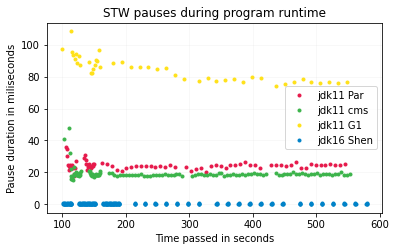

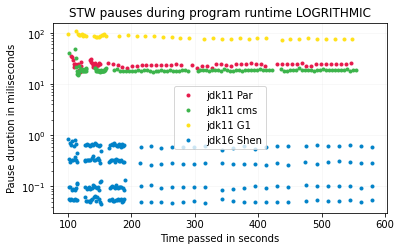

In [115]:
from src.plotting import plot_scatter

# Define a filter for searching for pauses in a gc_event_dataframe row
def pauses_only(row):
    if "EventType" in row:
        if row["EventType"] == "Pause":
            return True
    return False 

# Apply the filter, and create a plot
plot = plot_scatter(gc_event_dataframes, filter_by = pauses_only, labels=labels)

# Set the style and details on the plot
_ = plot.set_title("STW pauses during program runtime")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
plot.grid(alpha = 0.1)

############################################################################################################
# Chart #2, logarithmic Y axis

plot = plot_scatter(gc_event_dataframes, filter_by = pauses_only, labels = labels)
plot.set_yscale("log") # LOGRITHMIC log set, using already plotted values
_ = plot.set_title("STW pauses during program runtime LOGRITHMIC")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
plot.grid(alpha = 0.1)

## Pauses by name during runtime

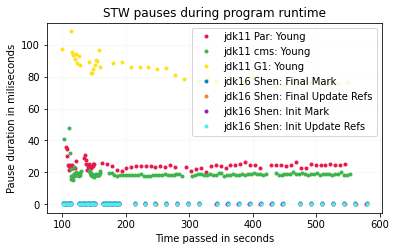

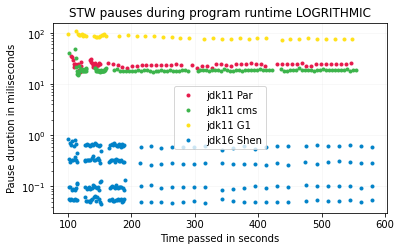

In [116]:
from plotting import plot_scatter
# Chart #1, linear Y axis
plot = plot_scatter(gc_event_dataframes, filter_by = pauses_only, labels=labels, group_by = "EventName")
_ = plot.set_title("STW pauses during program runtime")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
plot.grid(alpha = 0.1)

############################################################################################################

# Chart #2, logarithmic Y axis

plot = plot_scatter(gc_event_dataframes, filter_by = pauses_only, labels = labels)
plot.set_yscale("log") # LOGRITHMIC log set, using already plotted values
_ = plot.set_title("STW pauses during program runtime LOGRITHMIC")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
plot.grid(alpha = 0.1)

## Concurrent durations during runtime

'Logarithmic graph : Uncomment to view'

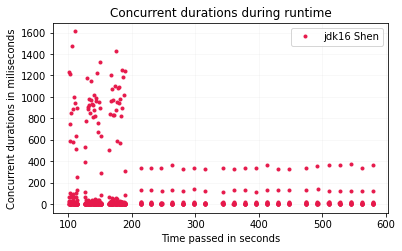

In [117]:
from plotting import plot_scatter

def concurrent_only(row):
    if "EventType" in row:
        if row["EventType"] == "Concurrent":
            return True
    return False

# Linear Graph
plot = plot_scatter(gc_event_dataframes, labels=labels, filter_by= concurrent_only)
_ = plot.set_title("Concurrent durations during runtime")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Concurrent durations in miliseconds")
plot.grid(alpha = 0.1)

'''Logarithmic graph : Uncomment to view'''
# plot = plot_scatter(gc_event_dataframes, labels=labels, filter_by= concurrent_only)
# plot.set_yscale("log")
# _ = plot.set_title("Concurrent durations during runtime LOGRITHMIC")
# plot.set_xlabel("Time passed in seconds")
# plot.set_ylabel("Concurrent durations in miliseconds")
# plot.grid(alpha = 0.1)


## Time spent in STW vs. Concurrent

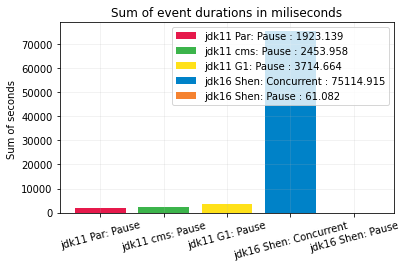

In [118]:
from plotting import plot_bar_sum

log = False # Set to True to view log bar graph as well
def duration_present(row):
    if "Duration_miliseconds" in row:
        if row["Duration_miliseconds"]:
            return True
    return False
# The grouping by eventtype means that every matching event name lives in one group. 
# Example: "Concurrent" events are a group, and "Pause" events are a group
plot = plot_bar_sum(gc_event_dataframes, group_by = "EventType", filter_by = duration_present, labels= labels)
_ = plot.set_title("Sum of event durations in miliseconds")
_ = plot.set_ylabel("Sum of seconds ")
_ = plt.xticks(rotation = 15)
plot.grid(alpha = 0.2)



## Comparing Trends within the data

In [119]:
from plotting import plot_trends
print("\t\t\tPauses during runtime\n------------------------------------------------------------------------------------------------------------------")
plot_trends(gc_event_dataframes, 
       filter_by = pauses_only,
       labels= labels,
       throughput=True)
print("\n\n\t\t\tPauses by name during runtime\n------------------------------------------------------------------------------------------------------------------")
plot_trends(gc_event_dataframes, 
       group_by = "EventName",
       filter_by = pauses_only,
       labels= labels)


			Pauses during runtime
------------------------------------------------------------------------------------------------------------------
  Trends (ms)   | Event Count   | Max Duration  | Sum Duration  | Mean Duration | Std Dev.      | Throughput    |
-----------------------------------------------------------------------------------------------------------------
jdk11 Par       |   79.0000     |   35.7980     | 1923.1390     |   24.3435     |    2.6456     |   99.6500     % 
jdk11 cms       |  128.0000     |   47.9220     | 2453.9580     |   19.1715     |    3.5636     |   99.5600     % 
jdk11 G1        |   44.0000     |  108.5310     | 3714.6640     |   84.4242     |    7.4597     |   96.9400     % 
jdk16 Shen      |  223.0000     |    0.8630     |   61.0820     |    0.2739     |    0.2326     |   99.9900     % 


			Pauses by name during runtime
------------------------------------------------------------------------------------------------------------------
Legend: 
A | jdk11 Par

## Percentiles of event durations

In [120]:
from plotting import plot_percentiles

print("\t\t\tPauses during runtime\n----------------------------------------------------------------------------------")
plot_percentiles(gc_event_dataframes, 
       filter_by = pauses_only,
       labels= labels)
print("\n\n\t\t\tPauses during runtime by name\n----------------------------------------------------------------------------------")
plot_percentiles(gc_event_dataframes, 
       group_by = "EventName",
       filter_by= pauses_only,
       labels= labels)
       

			Pauses during runtime
----------------------------------------------------------------------------------
Legend (All timing in miliseconds) : 
A | jdk11 Par
B | jdk11 cms
C | jdk11 G1
D | jdk16 Shen
-------------------------------------------------------------------------------------------------
    | 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
A   |   24.2440 |   24.8885 |   26.2448 |   29.3719 |   34.6896 |   35.6872 |   35.7869 | 
B   |   18.6195 |   19.0562 |   19.7271 |   20.9062 |   38.5860 |   47.0432 |   47.8341 | 
C   |   84.7620 |   89.0578 |   93.9287 |   96.2526 |  103.8462 |  108.0625 |  108.4842 | 
D   |    0.1330 |    0.4235 |    0.6384 |    0.6677 |    0.7666 |    0.8539 |    0.8621 | 


			Pauses during runtime by name
----------------------------------------------------------------------------------
Legend (All timing in miliseco

## Mean durations in miliseconds, pauses

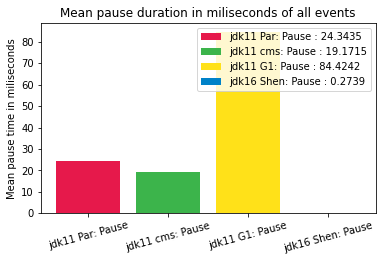

In [121]:
from plotting import plot_bar_avg

graph = plot_bar_avg(gc_event_dataframes, group_by = "EventType", filter_by = pauses_only, labels = labels)

_ = graph.set_title("Mean pause duration in miliseconds of all events")
_ = graph.set_ylabel("Mean pause time in miliseconds")
_ = plt.xticks(rotation = 15)

## Heap allocation used before & after GC

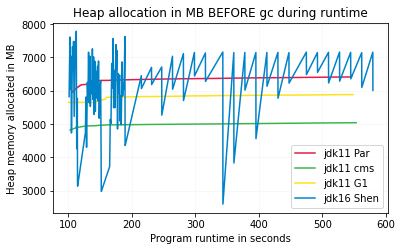

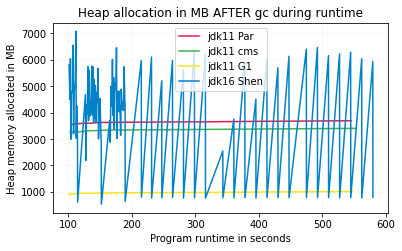

In [122]:
from plotting import plot_line

for df in gc_event_dataframes:
    if "TimeFromStart_seconds" in df:
        df.sort_values(by="TimeFromStart_seconds", axis=0,inplace=True)

def heap_before_gc(row):
    if "HeapBeforeGC" in row:
        if row["HeapBeforeGC"]:
            return True
    return False

def heap_after_gc(row):
    if "HeapAfterGC" in row:
        if row["HeapAfterGC"]:
            return True
    return False


plot = plot_line(gc_event_dataframes,
            group_by = None, 
            filter_by = heap_before_gc, # Confirm that this column has data for every row
            labels = labels,
            column = "HeapBeforeGC")

_ = plot.set_title("Heap allocation in MB BEFORE gc during runtime")
_ = plot.set_ylabel("Heap memory allocated in MB")
_ = plot.set_xlabel("Program runtime in seconds")
plot.grid(alpha = 0.1)
#----
plot = plot_line(gc_event_dataframes,
            group_by = None, 
            filter_by = heap_after_gc,
            labels = labels,
            column = "HeapAfterGC" )
            
_ = plot.set_title("Heap allocation in MB AFTER gc during runtime")
_ = plot.set_ylabel("Heap memory allocated in MB")
_ = plot.set_xlabel("Program runtime in seconds")

handles, labels = plot.get_legend_handles_labels()
plot.grid(alpha = 0.1)

## MB reclaimed during GC during runtime

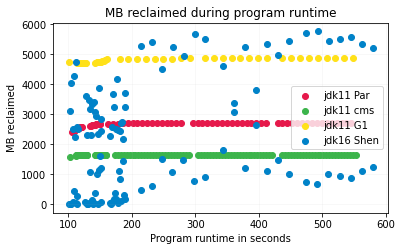

In [123]:
from plotting import plot_reclaimed_bytes

def gc_values_present(row):
    if "HeapBeforeGC" in row and "HeapAfterGC":
        if row["HeapBeforeGC"] != None and row["HeapAfterGC"] != None:
            return True
    return False

plot = plot_reclaimed_bytes(gc_event_dataframes, filter_by = gc_values_present, labels = labels)
_ = plot.set_title("MB reclaimed during program runtime")
_ = plot.set_ylabel("MB reclaimed")
_ = plot.set_xlabel("Program runtime in seconds")

plot.grid(alpha = 0.1)


## Heatmaps for each log

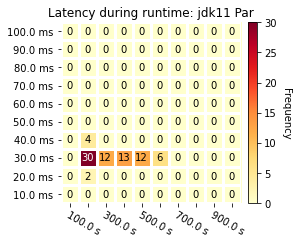

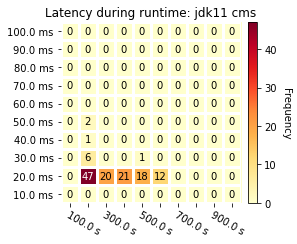

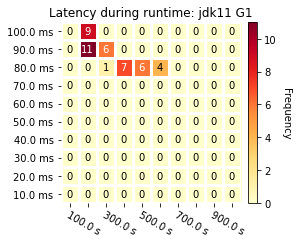

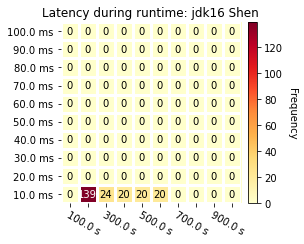

In [130]:
plt.rcParams["figure.figsize"] = [6, 3.5]
from src.graphing.heatmap import plot_heatmap, get_heatmap_data
from src.plotting2 import plot_heatmap2
dimensions = [10, 10, 100, 10]
frequency_ticks = True
plot_heatmap2(gc_event_dataframes,dimensions, filter_by = pauses_only, labels=labels, frequency_ticks = frequency_ticks)


## Frequency of pauses histogram

Text(0.5, 1.0, 'Pause frequencies during full runtime')

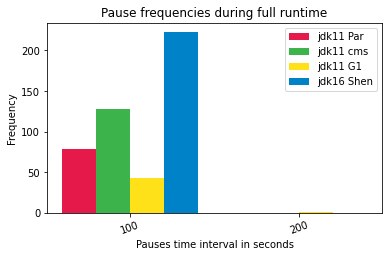

In [125]:
from plotting2 import plot_frequency_intervals

def pauses_only(row):
    if "EventType" in row:
        if row["EventType"] == "Pause":
            return True
    return False

# All intervals are in seconds
plot = plot_frequency_intervals(gc_event_dataframes,
                         filter_by = pauses_only,
                         interval_duration= 100,                          
                         labels = labels)
                         
_ = plt.xticks(rotation = 20)
plot.set_xlabel("Pauses time interval in seconds")
plot.set_ylabel("Frequency")
plot.set_title("Pause frequencies during full runtime")

Percentiles plotted:  [99.9, 90, 50]


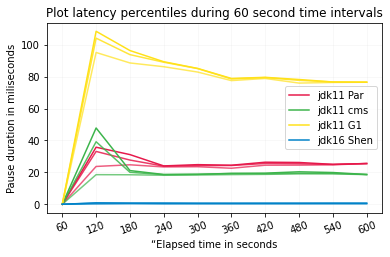

In [126]:
from plotting2 import plot_percentile_intervals
interval_duration = 60
percentiles = [99.9, 90, 50]
plot = plot_percentile_intervals(gc_event_dataframes, 
                                filter_by = pauses_only,
                                interval_duration = interval_duration ,
                                labels = labels,
                                percentiles = percentiles )
plot.set_ylabel("Pause duration in miliseconds")
plot.set_xlabel("“Elapsed time in seconds")
plot.set_title("Plot latency percentiles during "+ str(interval_duration) + " second time intervals")
plot.grid(alpha = 0.1)
_ = plt.xticks(rotation = 20)
print("Percentiles plotted: ", percentiles)

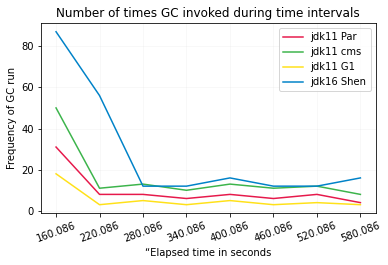

In [127]:
from plotting2 import plot_frequency_of_gc_intervals

plot = plot_frequency_of_gc_intervals(gc_event_dataframes, 
                                      filter_by = pauses_only, 
                                      interval_duration = 60 , 
                                      labels = labels)
plot.set_ylabel("Frequency of GC run")
plot.set_xlabel("“Elapsed time in seconds")
plot.set_title("Number of times GC invoked during time intervals")
plot.grid(alpha = 0.1)
_ = plt.xticks(rotation = 20)

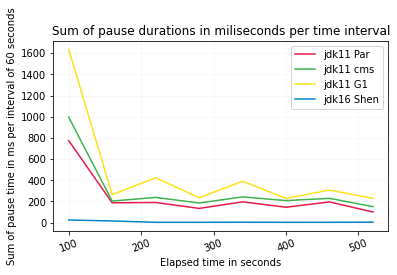

In [128]:
from plotting2 import plot_sum_pause_intervals

interval_duration = 60
plot = plot_sum_pause_intervals(gc_event_dataframes,
                                filter_by = pauses_only,
                                interval_duration = interval_duration, 
                                labels = labels)
_ = plot.set_title("Sum of pause durations in miliseconds per time interval")
plot.set_ylabel("Sum of pause time in ms per interval of " + str(interval_duration) + " seconds", )
plot.set_xlabel("Elapsed time in seconds")
plot.grid(alpha = 0.1)
_ = plt.xticks(rotation = 20)